In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "path_to_world_happiness_report.csv"  # Replace with actual path
data = pd.read_csv(dataset_path)

# Display the first 10 rows
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [17]:

# 2. List all columns and their data types
print("\nColumns and Data Types:")
print(data.dtypes)



Columns and Data Types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [18]:
# Step 2: Basic Statistics
# 1. Calculate the mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print("\nBasic Statistics for 'score':")
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_dev_score}")

# 2. Identify the country with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax()]
lowest_score_country = data.loc[data['score'].idxmin()]

print("\nCountry with Highest Happiness score:")
print(highest_score_country)

print("\nCountry with Lowest Happiness score:")
print(lowest_score_country)


Basic Statistics for 'score':
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995

Country with Highest Happiness score:
Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: object

Country with Lowest Happiness score:
Country name                    Afghanistan
score                                 1.721
Log GDP per capita                    0.628
Social support                          0.0
Healthy life expectancy               0.242
Freedom to make life choices            0.0
Generosity                            0.091
Perceptions of corruption             0.088
Dystopia + residual                   0.672
Name: 142, dtype: object


In [19]:
# Step 3: Missing Values
# Check if there are any missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [20]:
# Step 4: Filtering and Sorting
# 1. Filter the dataset to show only countries with a Score greater than 7.5
filtered_data = data[data['score'] > 7.5]
print("\nCountries with Score Greater than 7.5:")
print(filtered_data)

# 2. Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_filtered_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 Countries by GDP per Capita (Score > 7.5):")
print(sorted_filtered_data.head(10))


Countries with Score Greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 Countries by GDP per Capita (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881    

In [21]:
# Step 5: Adding New Columns
# Create a new column called Happiness Category based on the Score
conditions = [
    (data['score'] < 4),
    (data['score'] >= 4) & (data['score'] <= 6),
    (data['score'] > 6)
]
categories = ['Low', 'Medium', 'High']
data['Happiness Category'] = np.select(conditions, categories, default='Unknown')
print("\nHappiness Categories Added:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))


Happiness Categories Added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


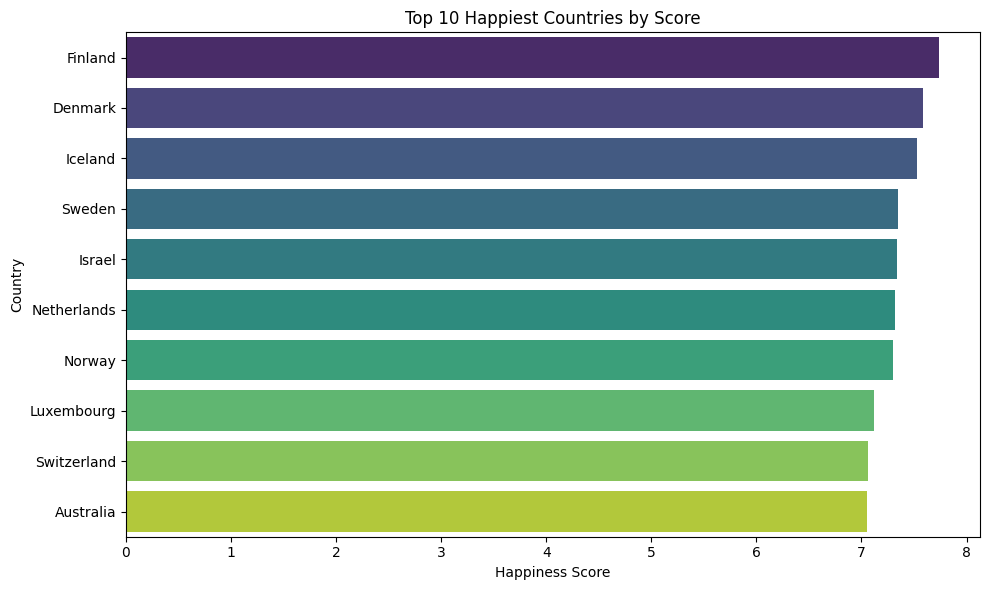

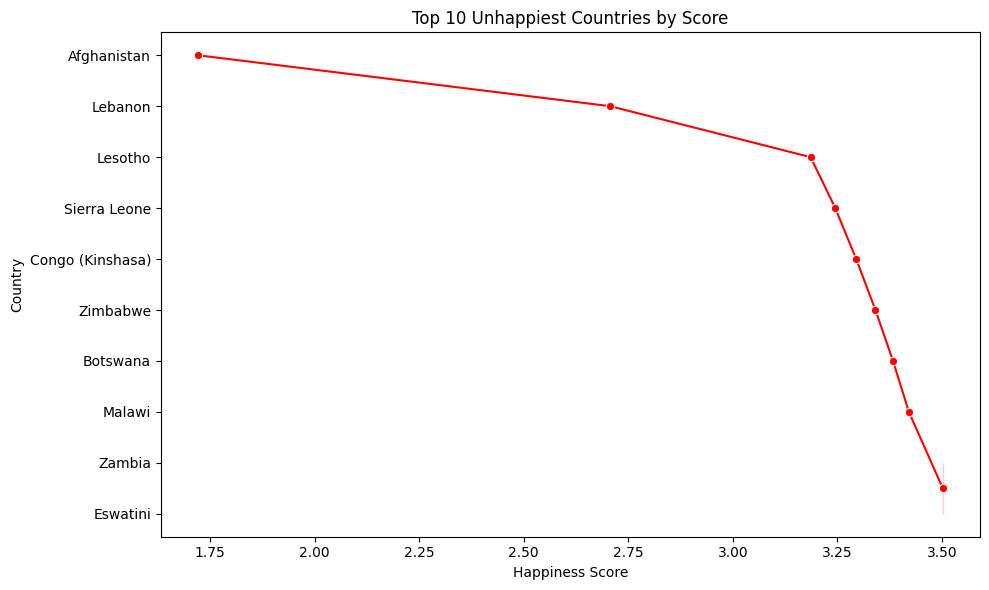

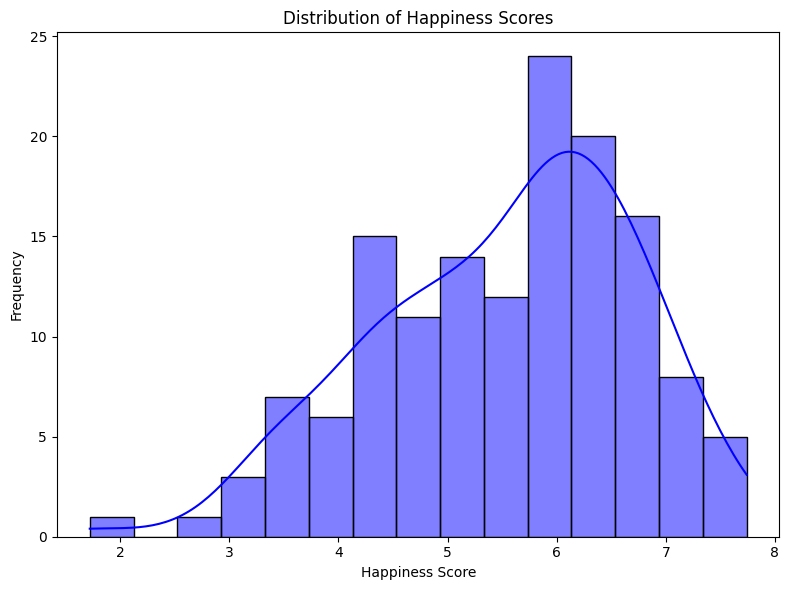

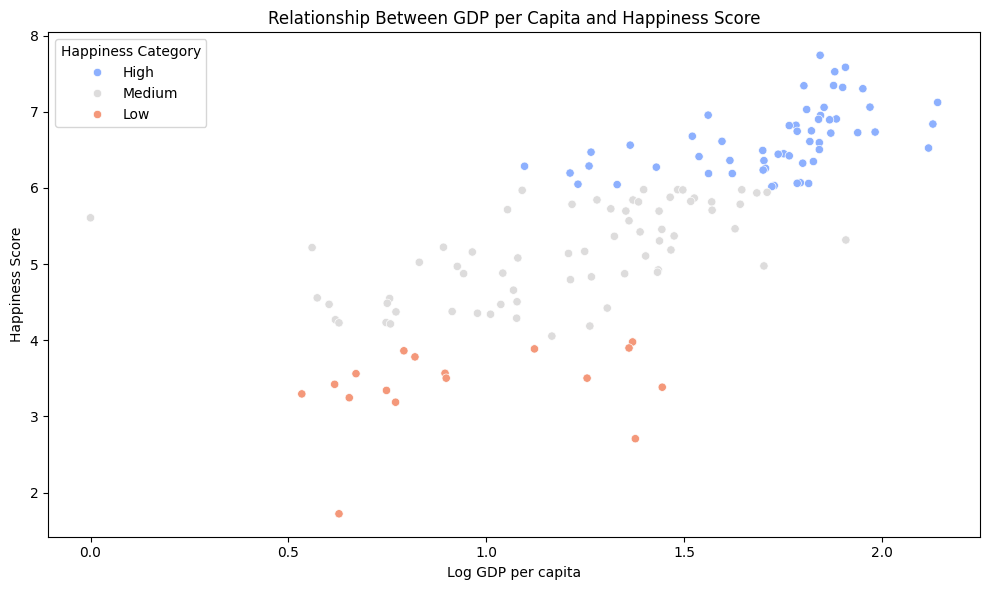

In [22]:
# Step 6: Data Visualizations
# 1. Bar Plot: Top 10 happiest countries by Score
top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, hue='Country name', palette='viridis', legend=False)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 2. Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 3. Histogram for Score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['score'], bins=15, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='coolwarm')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.tight_layout()
plt.show()

In [23]:
# Step 7: South Asia Dataset Preparation
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
south_asia_data.to_csv("south_asia_happiness.csv", index=False)
print("\nSouth Asia Dataset Prepared and Saved")


South Asia Dataset Prepared and Saved


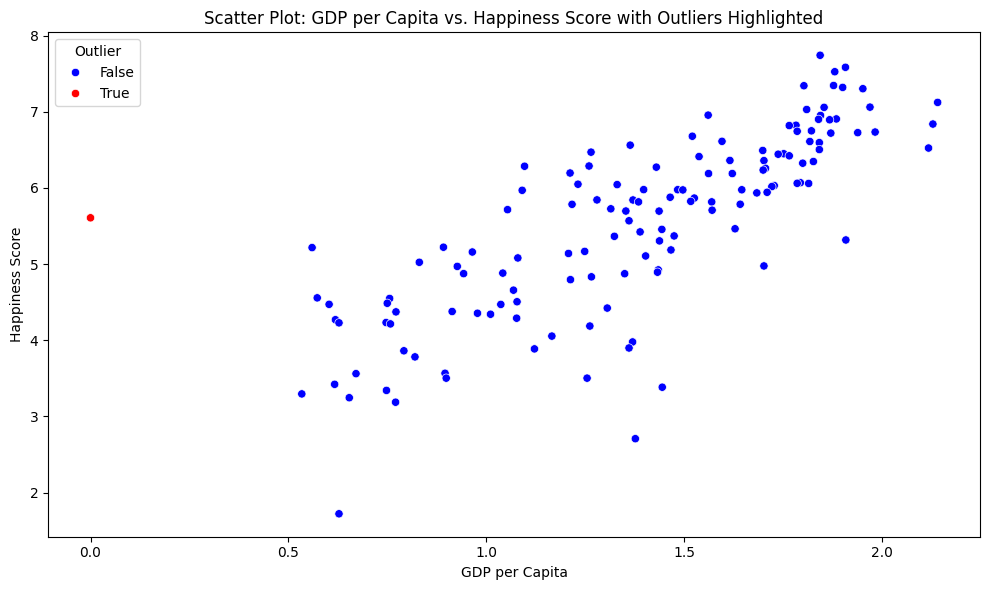

In [41]:
# Step 8: Outlier Detection for Scatter Plot
# Calculate the IQR for GDP per Capita
q1 = data['Log GDP per capita'].quantile(0.25)
q3 = data['Log GDP per capita'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
data['Outlier'] = (data['Log GDP per capita'] < lower_bound) | (data['Log GDP per capita'] > upper_bound)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot( x='Log GDP per capita', y='score', data=data, hue='Outlier', palette={False: 'blue', True: 'red'})
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score with Outliers Highlighted')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Outlier')
plt.tight_layout()
plt.show()


<ipython-input-38-249ad61fac36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data.loc[:, 'Composite Score'] = 0.4 * south_asia_data['Log GDP per capita'] + \


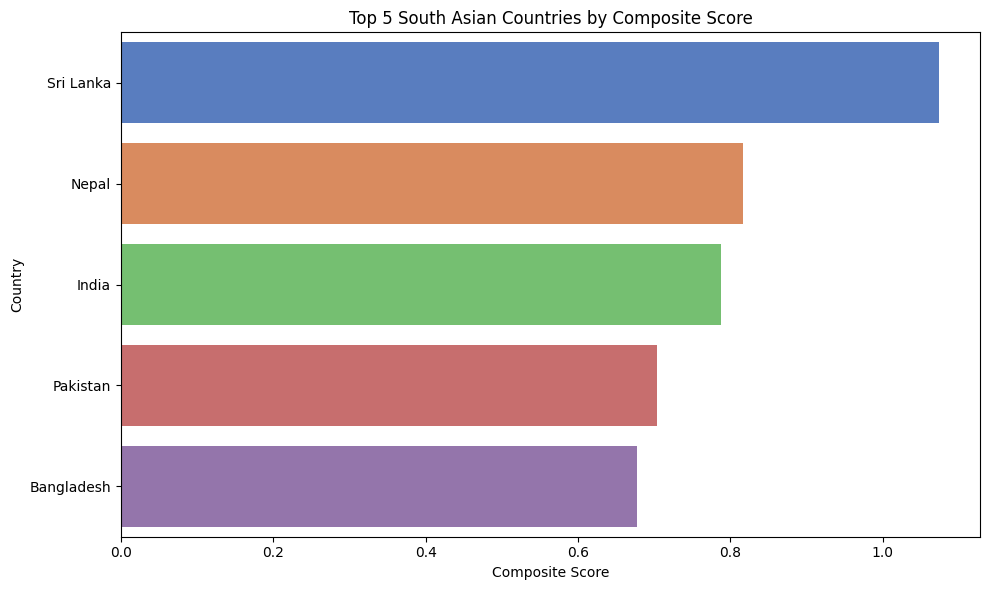

In [38]:
# Step 9: Composite Score Ranking
south_asia_data.loc[:, 'Composite Score'] = 0.4 * south_asia_data['Log GDP per capita'] + \
                                            0.3 * south_asia_data['Social support'] + \
                                            0.3 * south_asia_data['Healthy life expectancy']
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Visualize top 5 countries by Composite Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asia_data.head(5), hue='Country name', palette='muted', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Correlation between Freedom to make life choices and Happiness Score: 0.8005185224163315


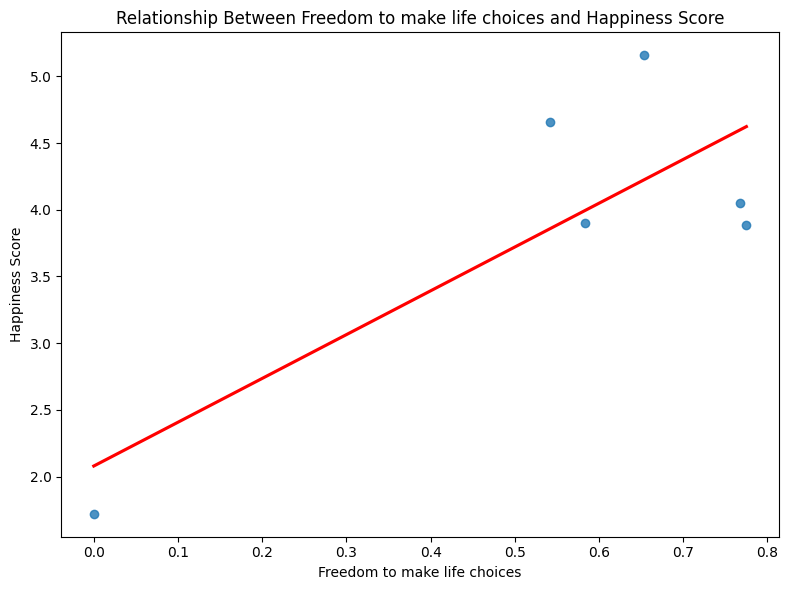

Correlation between Generosity and Happiness Score: 0.874512371253192


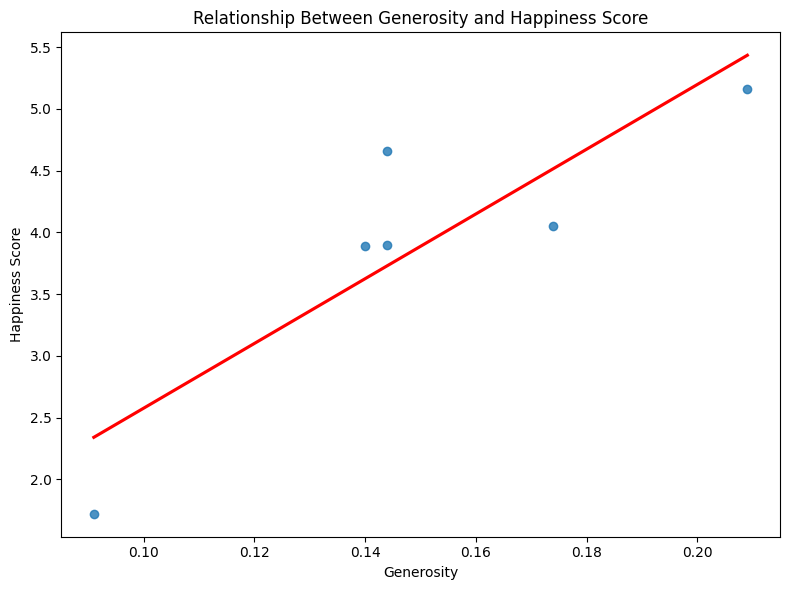

In [25]:
# Step 10: Correlation Analysis
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Correlation between {metric} and Happiness Score: {correlation}")
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, ci=None, line_kws={'color': 'red'})
    plt.title(f'Relationship Between {metric} and Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()

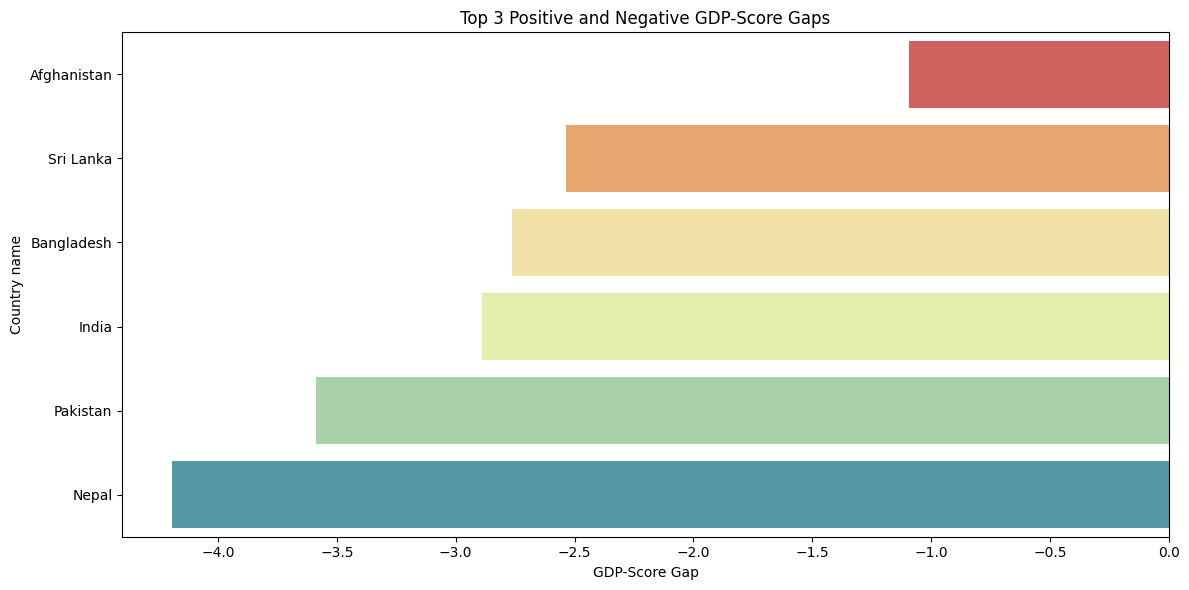

In [26]:
# Step 10: Gap Analysis
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
ranked_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

# Concatenate top 3 positive and negative gaps
top_gap = pd.concat([ranked_gap.head(3), ranked_gap.tail(3)])

# Visualize top 3 positive and negative gaps
plt.figure(figsize=(12, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=top_gap,
    palette='Spectral',
    hue='Country name',
    dodge=False,  # Prevent stacking when hue is set
    legend=False  # Suppress the legend
)

plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.tight_layout()
plt.show()

In [27]:
# Problem - 3 - Comparative Analysis

# Step 1: Middle East Dataset Preparation
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
middle_east_data.to_csv("middle_east_happiness.csv", index=False)
print("\nMiddle East Dataset Prepared and Saved")


Middle East Dataset Prepared and Saved


In [28]:
# Step 2: Descriptive Statistics
# Calculate the mean and standard deviation for both regions
south_asia_mean_score = south_asia_data['score'].mean()
middle_east_mean_score = middle_east_data['score'].mean()
south_asia_std_score = south_asia_data['score'].std()
middle_east_std_score = middle_east_data['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean Score: {south_asia_mean_score}, Std Dev: {south_asia_std_score}")
print(f"Middle East - Mean Score: {middle_east_mean_score}, Std Dev: {middle_east_std_score}")


Descriptive Statistics:
South Asia - Mean Score: 3.895666666666667, Std Dev: 1.1770690152521501
Middle East - Mean Score: 5.412100000000001, Std Dev: 1.5662011684327144


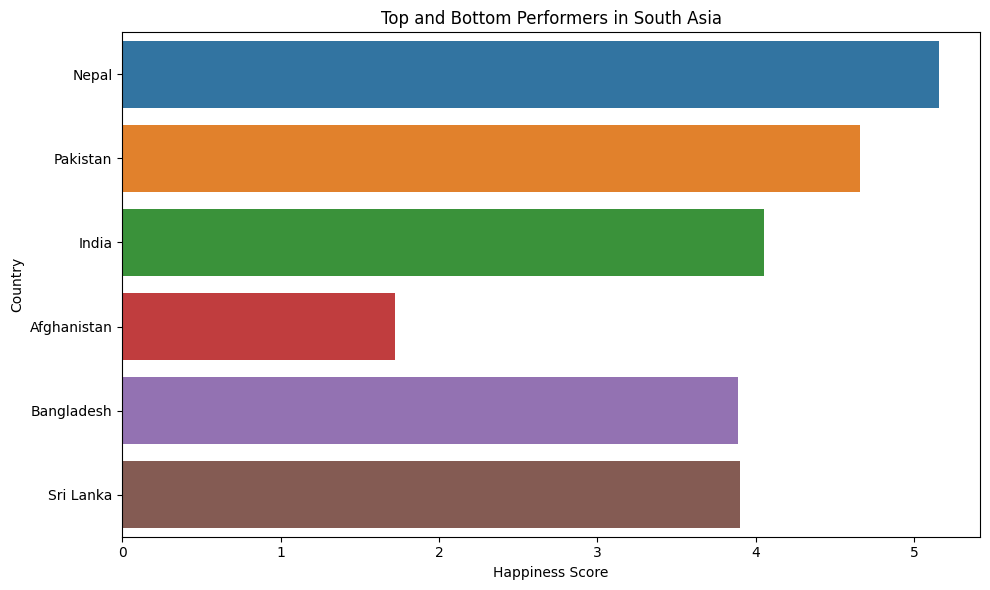

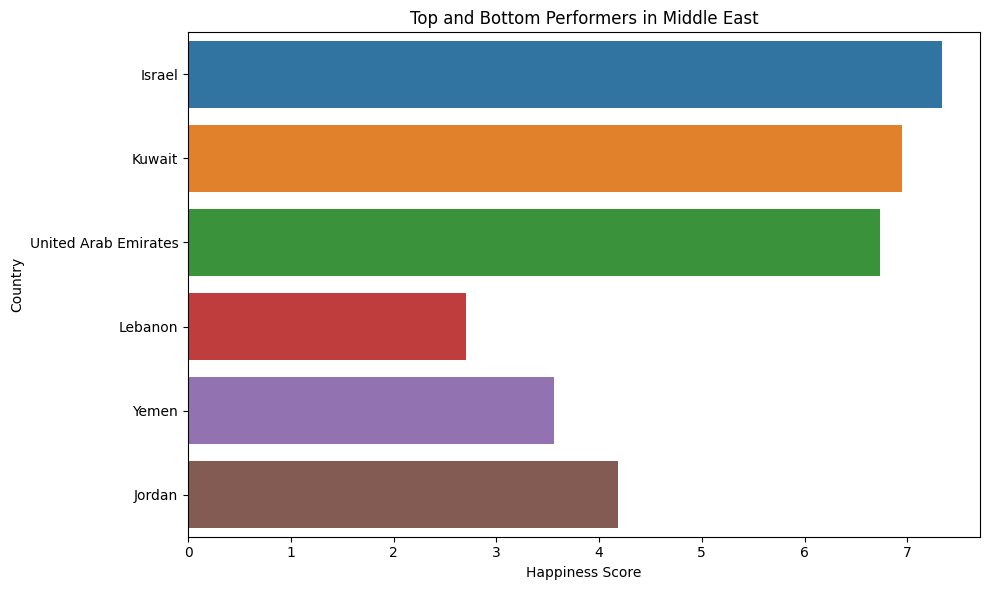

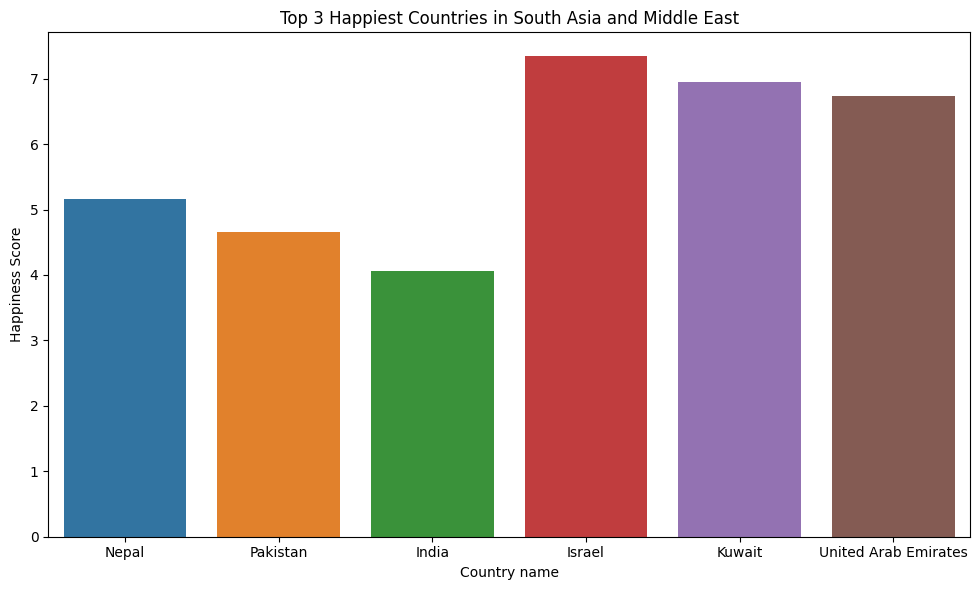

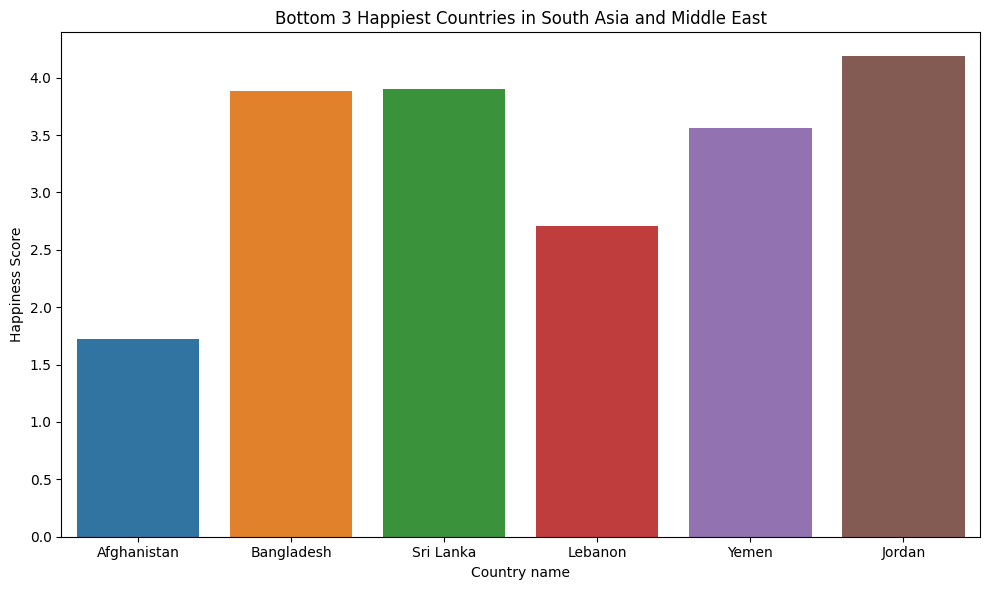

In [37]:
# Step 3: Top and Bottom Performers
# Identify the top 3 and bottom 3 countries in each region
top_3_south_asia = south_asia_data.nlargest(3, 'score')
bottom_3_south_asia = south_asia_data.nsmallest(3, 'score')
top_3_middle_east = middle_east_data.nlargest(3, 'score')
bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')

# Visualize Top and Bottom Performers
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), hue='Country name', dodge=False)
plt.title('Top and Bottom Performers in South Asia')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), hue='Country name', dodge=False)
plt.title('Top and Bottom Performers in Middle East')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#Bar char comparing both charts
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter data for each region
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Top 3 and Bottom 3 for South Asia
top_3_sa = south_asia_data.nlargest(3, 'score')
bottom_3_sa = south_asia_data.nsmallest(3, 'score')

# Top 3 and Bottom 3 for Middle East
top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')

# Plot Top 3 comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=pd.concat([top_3_sa, top_3_me]), hue='Country name', dodge=False)
plt.title('Top 3 Happiest Countries in South Asia and Middle East')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Plot Bottom 3 comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=pd.concat([bottom_3_sa, bottom_3_me]), hue='Country name', dodge=False)
plt.title('Bottom 3 Happiest Countries in South Asia and Middle East')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


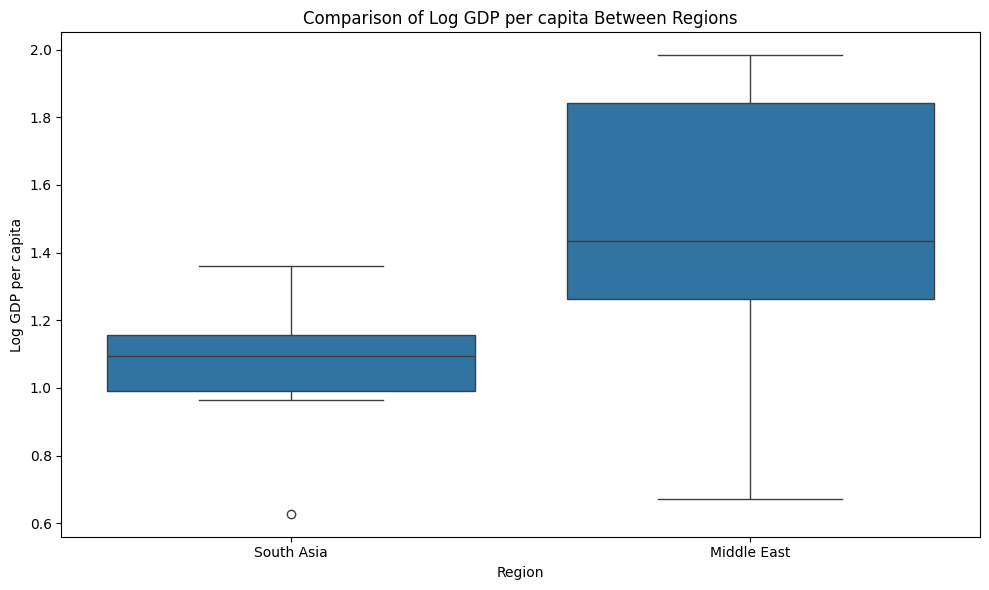

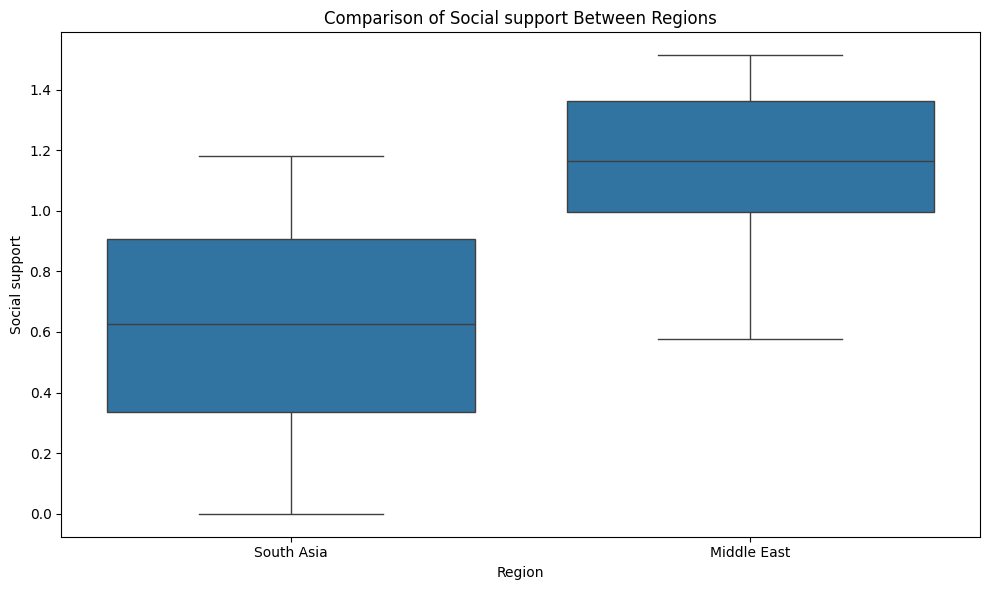

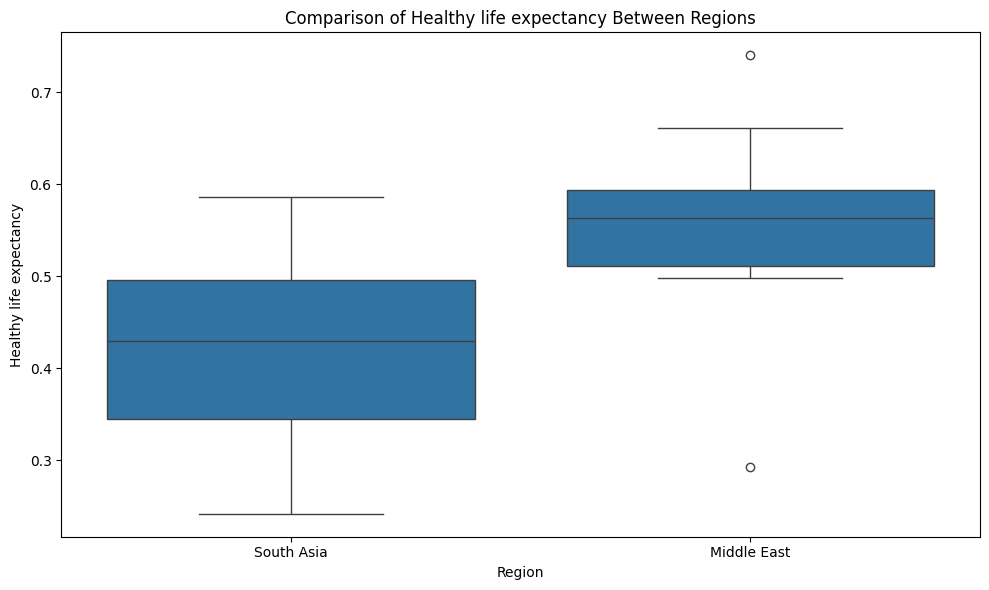

In [36]:
# Step 4: Metric Comparisons
# Compare Log GDP per capita, Social support, and Healthy life expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    comparison_data = pd.DataFrame({
        'Region': ['South Asia'] * len(south_asia_data) + ['Middle East'] * len(middle_east_data),
        metric: list(south_asia_data[metric]) + list(middle_east_data[metric])
    })
    sns.boxplot(x='Region', y=metric, data=comparison_data)
    plt.title(f'Comparison of {metric} Between Regions')
    plt.xlabel('Region')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

In [42]:
# Step 5: Happiness Disparity
# Compute range and coefficient of variation for both regions
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
south_asia_cv = south_asia_std_score / south_asia_mean_score
middle_east_cv = middle_east_std_score / middle_east_mean_score

print("\nHappiness Disparity:")
print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")


Happiness Disparity:
South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405



Correlation of Freedom to make life choices with Score:
South Asia: 0.8005185224163315, Middle East: 0.8632202433827543


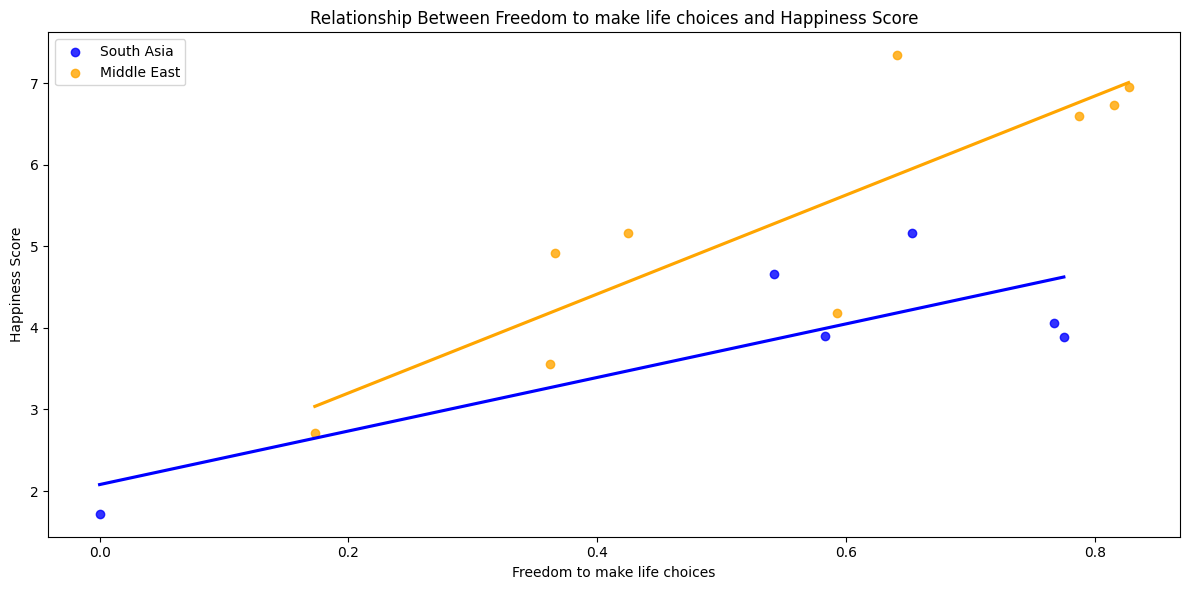


Correlation of Generosity with Score:
South Asia: 0.874512371253192, Middle East: 0.6275236536964182


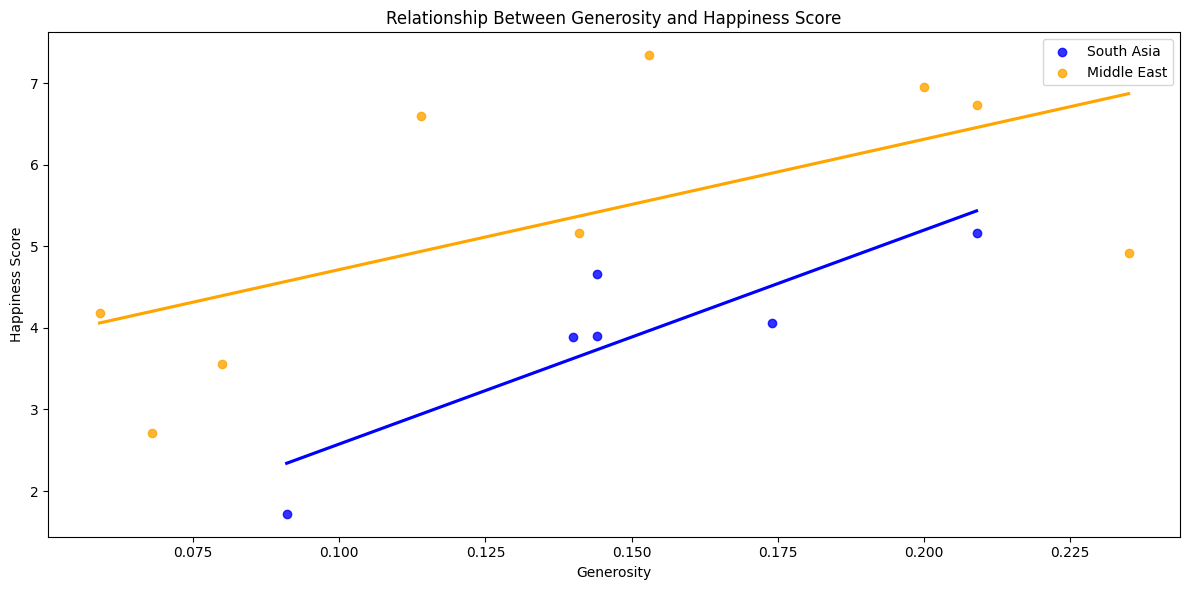

In [43]:
# Step 6: Correlation Analysis
# Analyze correlation of Freedom and Generosity with Happiness Score
correlation_metrics = ['Freedom to make life choices', 'Generosity']
for metric in correlation_metrics:
    south_asia_corr = south_asia_data[metric].corr(south_asia_data['score'])
    middle_east_corr = middle_east_data[metric].corr(middle_east_data['score'])
    print(f"\nCorrelation of {metric} with Score:")
    print(f"South Asia: {south_asia_corr}, Middle East: {middle_east_corr}")

    plt.figure(figsize=(12, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, ci=None, label='South Asia', color='blue')
    sns.regplot(x=metric, y='score', data=middle_east_data, ci=None, label='Middle East', color='orange')
    plt.title(f'Relationship Between {metric} and Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.tight_layout()
    plt.show()



Outliers in South Asia for score:
    Country name  score
142  Afghanistan  1.721


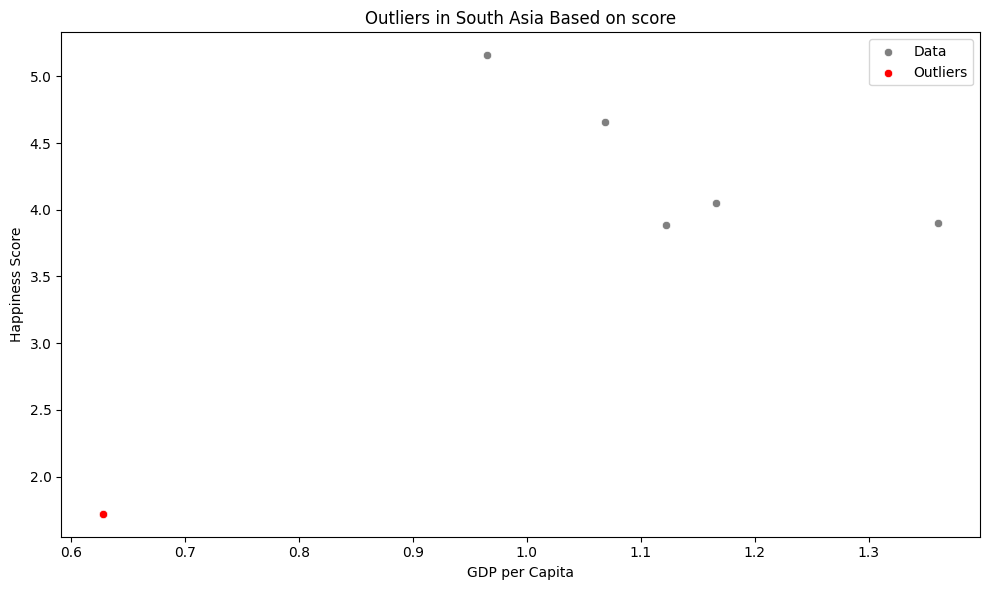


Outliers in South Asia for Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


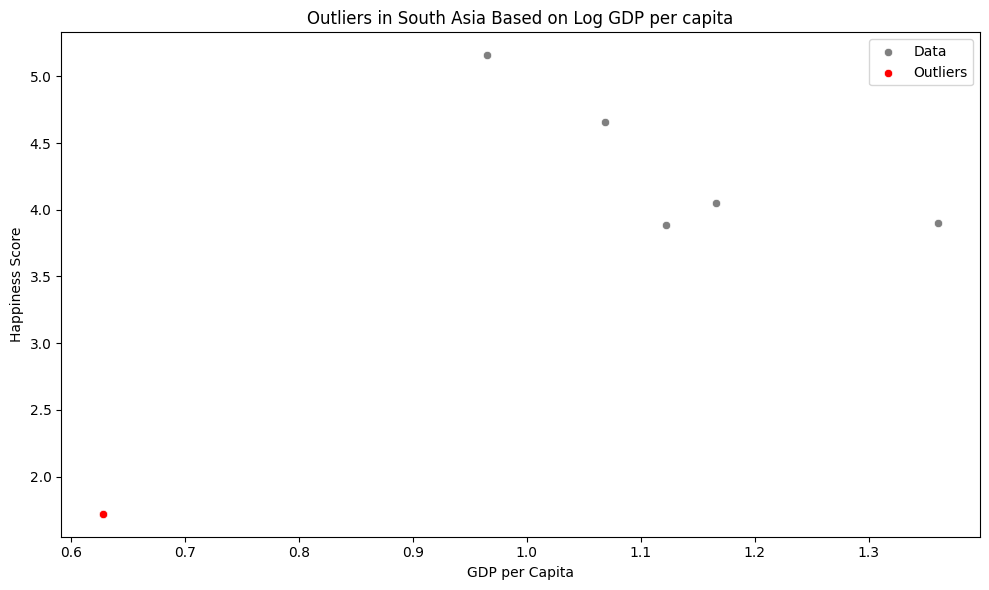


Outliers in Middle East for score:
Empty DataFrame
Columns: [Country name, score]
Index: []


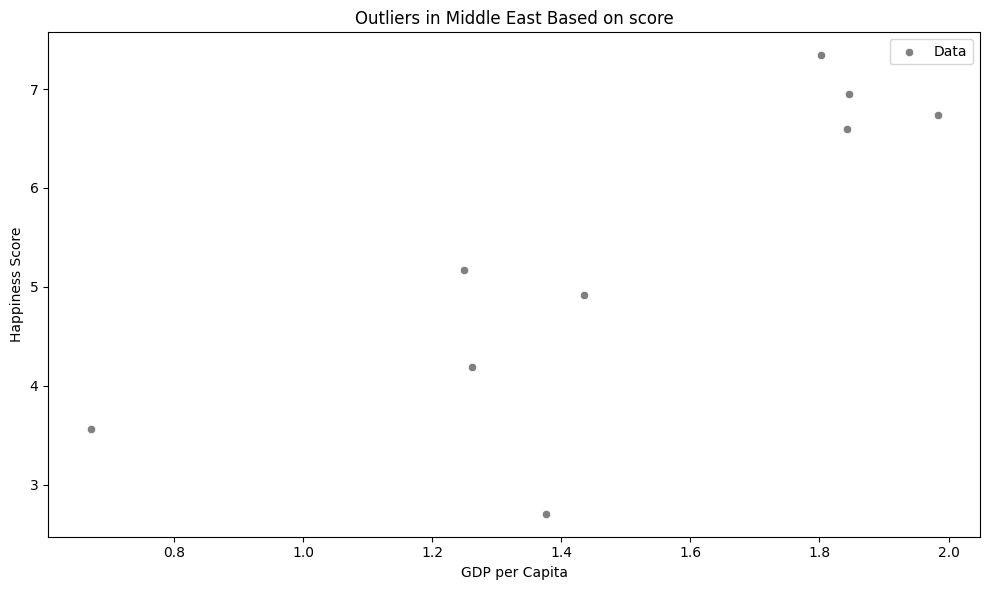


Outliers in Middle East for Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


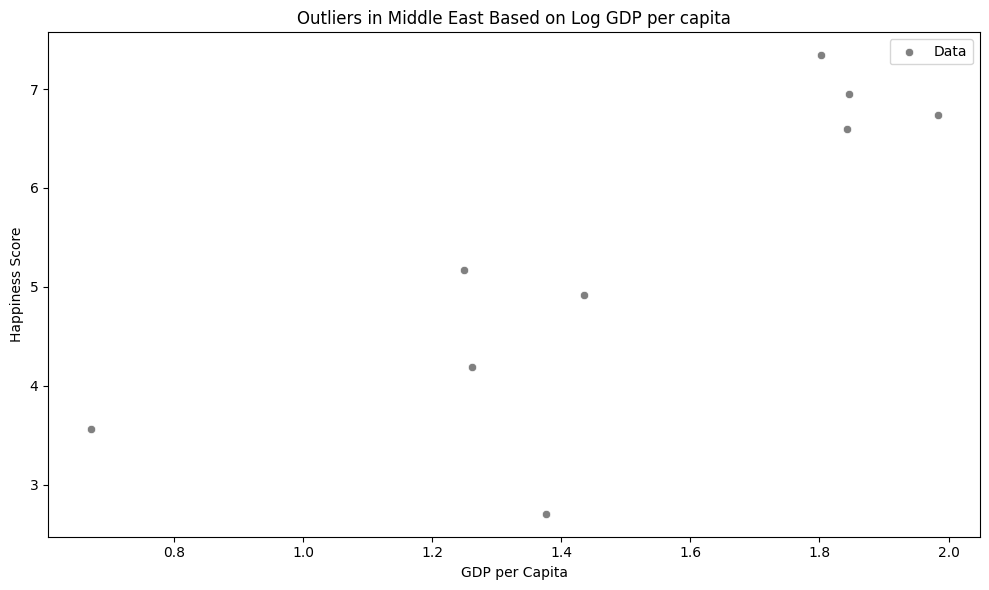


Comparative Analysis Completed


In [44]:
# Step 7: Outlier Detection
# Identify outliers based on Score and GDP per Capita using 1.5 * IQR
regions = {'South Asia': south_asia_data, 'Middle East': middle_east_data}
for region, region_data in regions.items():
    for metric in ['score', 'Log GDP per capita']:
        Q1 = region_data[metric].quantile(0.25)
        Q3 = region_data[metric].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = region_data[(region_data[metric] < lower_bound) | (region_data[metric] > upper_bound)]
        print(f"\nOutliers in {region} for {metric}:")
        print(outliers[['Country name', metric]])

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Log GDP per capita', y='score', data=region_data, label='Data', color='grey')
        sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, label='Outliers', color='red')
        plt.title(f'Outliers in {region} Based on {metric}')
        plt.xlabel('GDP per Capita')
        plt.ylabel('Happiness Score')
        plt.legend()
        plt.tight_layout()
        plt.show()

print("\nComparative Analysis Completed")